## 1. Load Sentinel-1 data through the datacube API  <a name="load"></a>

Area of interest is Lake George, an endorheic lake in south-eastern New South Wales, Australia.

In [1]:
%matplotlib inline
import numpy as np
import datacube

In [2]:
dc = datacube.Datacube(config='radar.conf')

In [3]:
# Define area and time period of interest
# area to check valid_area indexing
query = {
'y': (-32.0, -31.7), 
'x': (148.45, 148.5),
'time':('2018-11-01','2019-01-01'),
'crs': 'EPSG:4326',
'output_crs': 'EPSG: 3577',
'resolution': (25, -25)
}
# area to check lia
query = {
'y': (-31.12, -31.1), 
'x': (147.9, 148.5),
'time':('2018-12-10','2019-01-01'),
'crs': 'EPSG:4326',
'output_crs': 'EPSG: 3577',
'resolution': (25, -25)
}

In [4]:
radar = dc.load(product='s1_gamma0_scene_snap7', group_by='solar_day', **query)

In [5]:
radar

<xarray.Dataset>
Dimensions:  (time: 4, x: 2260, y: 376)
Coordinates:
  * time     (time) datetime64[ns] 2018-12-10T19:23:25.464391 ... 2018-12-27T19:31:22.731083
  * y        (y) float64 -3.489e+06 -3.489e+06 ... -3.48e+06 -3.48e+06
  * x        (x) float64 1.554e+06 1.554e+06 1.554e+06 ... 1.498e+06 1.497e+06
Data variables:
    vh       (time, y, x) float32 0.0015879814 0.0012338508 ... 0.011184559
    vv       (time, y, x) float32 0.013833875 0.016789498 ... 0.034299787
    lia      (time, y, x) float32 40.596375 43.011337 ... 37.319668 38.36471
Attributes:
    crs:      EPSG: 3577

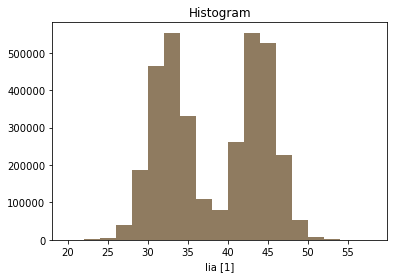

In [42]:
radar.lia.plot.hist(bins=np.arange(20,60,2));
radar_6.lia.plot.hist(bins=np.arange(20,60,2), alpha=0.5);

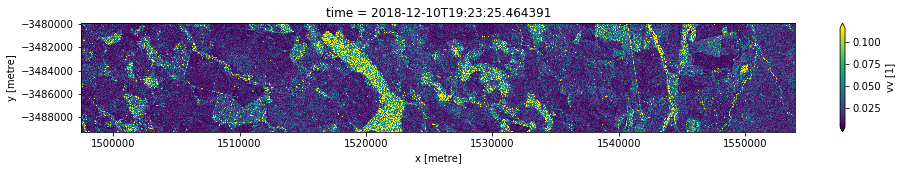

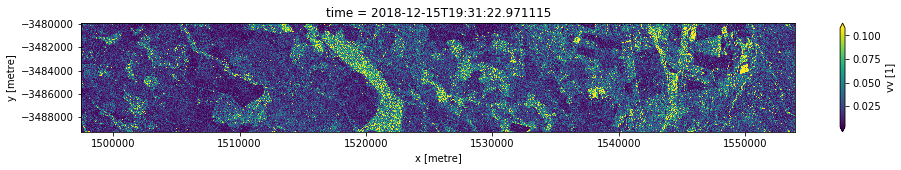

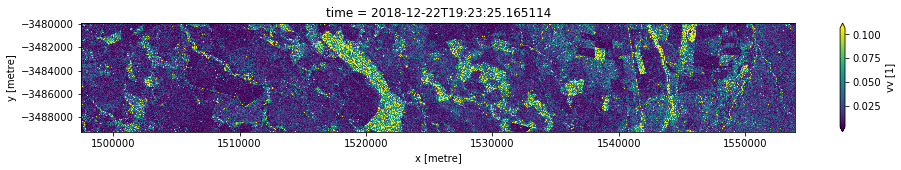

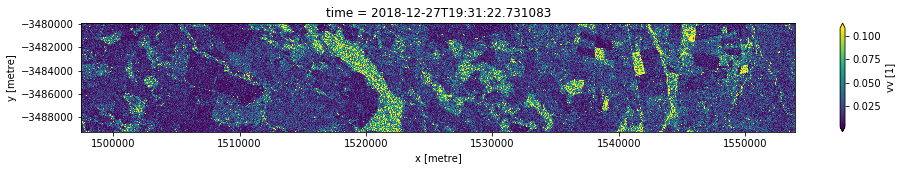

In [7]:
#vv.plot(col='time', col_wrap=3, robust=True);
for i in range(len(radar.time)):
    vv = radar.vv.isel(time=i).where(radar.vv.isel(time=i)>0)
    vv.plot(robust=True, figsize=(16,2))

/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


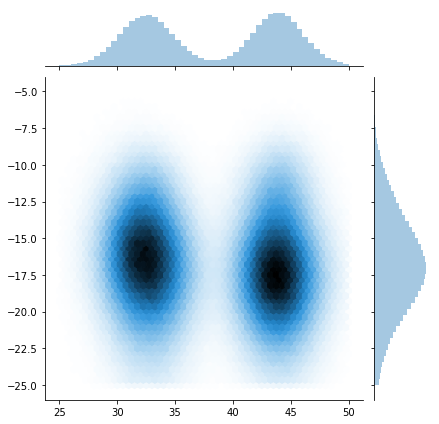

In [24]:
import seaborn as sns

arr_vv = 10*np.log10(radar.vv.values.ravel())
arr_vh = 10*np.log10(radar.vh.values.ravel())
arr_lia = radar.lia.values.ravel()
mask = ~np.isnan(arr_vv) & (arr_vv<-5) & (arr_vh<-10) & (arr_vv>-25) & (arr_vh>-35) & (arr_lia>25) & (arr_lia<50)
#mask = mask & (arr_vh>-20)

sns.jointplot(arr_lia[mask], arr_vv[mask], kind='hex')

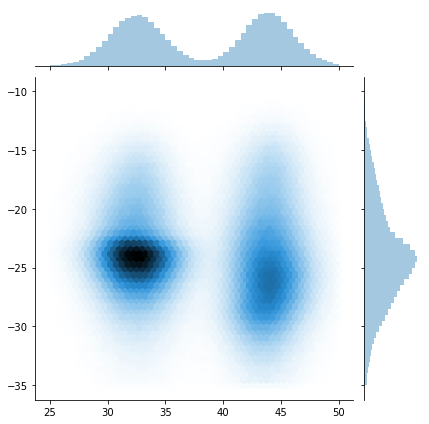

In [25]:
sns.jointplot(arr_lia[mask], arr_vh[mask], kind='hex')

/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


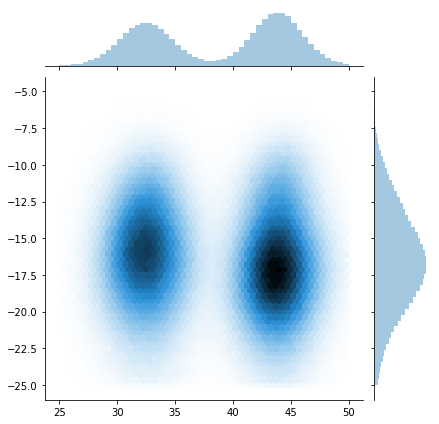

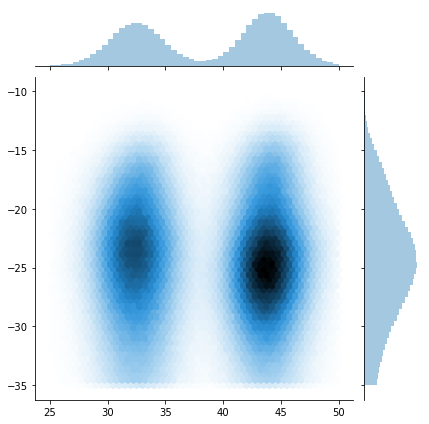

In [27]:
radar_6 = dc.load(product='s1_gamma0_scene_v5', group_by='solar_day', **query)

def plot(radar):
    arr_vv = 10*np.log10(radar.vv.values.ravel())
    arr_vh = 10*np.log10(radar.vh.values.ravel())
    arr_lia = radar.lia.values.ravel()
    mask = ~np.isnan(arr_vv) & (arr_vv<-5) & (arr_vh<-10) & (arr_vv>-25) & (arr_vh>-35) & (arr_lia>25) & (arr_lia<50)
    #mask = mask & (arr_vh>-20)
    sns.jointplot(arr_lia[mask], arr_vv[mask], kind='hex')
    sns.jointplot(arr_lia[mask], arr_vh[mask], kind='hex')
    
plot(radar_6)

/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sy

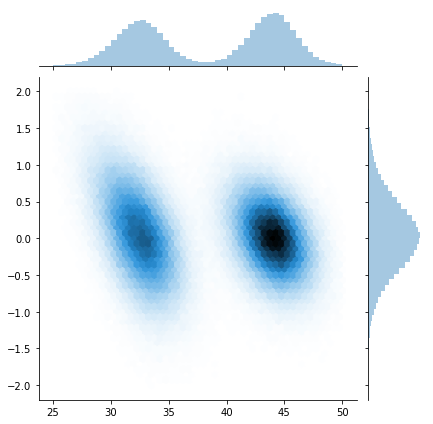

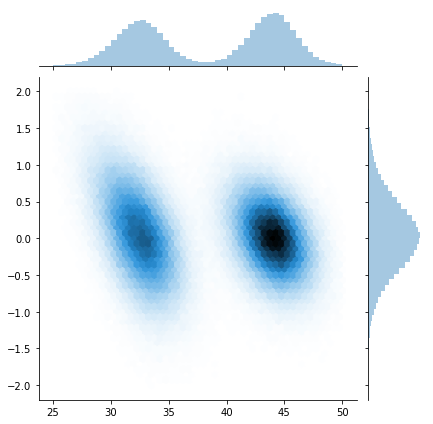

In [31]:
def plot(radar, radar2):
    arr_vv = 10*np.log10(radar.vv.values.ravel())
    arr_vh = 10*np.log10(radar.vh.values.ravel())
    arr_lia = radar.lia.values.ravel()
    mask = ~np.isnan(arr_vv) & (arr_vv<-5) & (arr_vh<-10) & (arr_vv>-25) & (arr_vh>-35) & (arr_lia>25) & (arr_lia<50)
    arr_vv_2 = 10*np.log10(radar2.vv.values.ravel())
    arr_vh_2 = 10*np.log10(radar2.vh.values.ravel())
    arr_lia_2 = radar2.lia.values.ravel()
    mask =  mask & ~np.isnan(arr_vv_2) & (arr_vv_2<-5) & (arr_vh_2<-10) & (arr_vv_2>-25) & (arr_vh_2>-35)
    mask = mask & (arr_vh>-20)
    
    diff = (arr_vh-arr_vh_2)
    mask = mask & (diff>-2) & (diff<2)
    sns.jointplot(arr_lia[mask], diff[mask], kind='hex')#,ylim=(-5,5))
    sns.jointplot(arr_lia[mask], diff[mask], kind='hex')#,ylim=(-5,5))
    
plot(radar, radar_6)

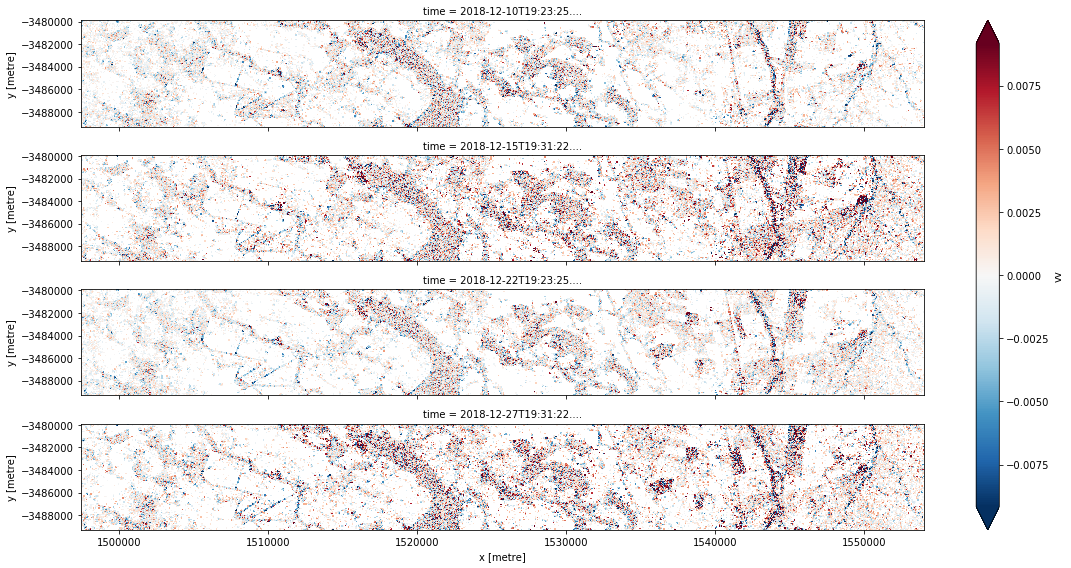

In [19]:
from scipy import ndimage
(radar.vv-radar_6.vv).groupby('time').apply(ndimage.uniform_filter,(7,7)).where(np.log10(radar.vh)>-2).plot(row='time',figsize=(16,8),robust=True)

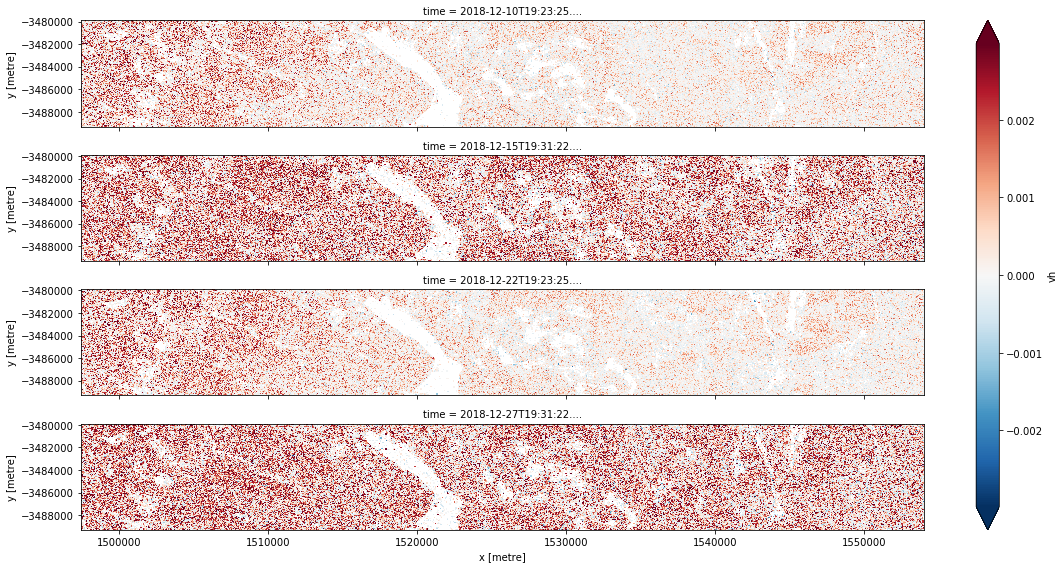

In [23]:
(radar.vh-radar_6.vh).where(np.log10(radar.vh)<-2.5).plot(row='time',figsize=(16,8),robust=True)

In [40]:
(radar.lia-radar_6.lia).mean()

<xarray.DataArray 'lia' ()>
array(0., dtype=float32)

In [20]:
radar.lia.groupby('time').mean().values

array([43.89165 , 32.53808 , 43.893135, 32.53081 ], dtype=float32)